In [1]:
import LAMINAR
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_swiss_roll, make_circles

In [2]:
def moons(n=2500):
    X, y = make_moons(n_samples=n, noise=0.1)
    X = X.astype(np.float32)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def swiss_roll(n=2500):
    X, y = make_swiss_roll(n_samples=n, noise=0.75)
    X = X.astype(np.float32)[:, [0, 2]]
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def circles(n=2500):
    X, y = make_circles(n_samples=n, noise=0.05, factor=0.5)
    X = X.astype(np.float32)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def uniform_sphere(n=2500):
    X = np.random.normal(0, 1, (n, 2))
    X = torch.tensor(X, dtype=torch.float32)
    X = LAMINAR.utils.gaussian2uniform.gaussian_to_sphere(X).numpy()
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def gaussians(n=2500):
    m1 = np.array([-1, 0])
    m2 = np.array([1, 1.5])

    c1 = np.array([[1, 0.8], [0.8, 1]])
    c2 = np.array([[1, -0.75], [-0.75, 1]])

    X1 = np.random.multivariate_normal(m1, c1, n//2)
    X2 = np.random.multivariate_normal(m2, c2, n//2)

    X = np.concatenate([X1, X2], axis=0)

    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [3]:
data_1 = moons()
data_2 = swiss_roll()
data_3 = circles()

titles = ['Moons', 'Sphere', 'Gaussians']

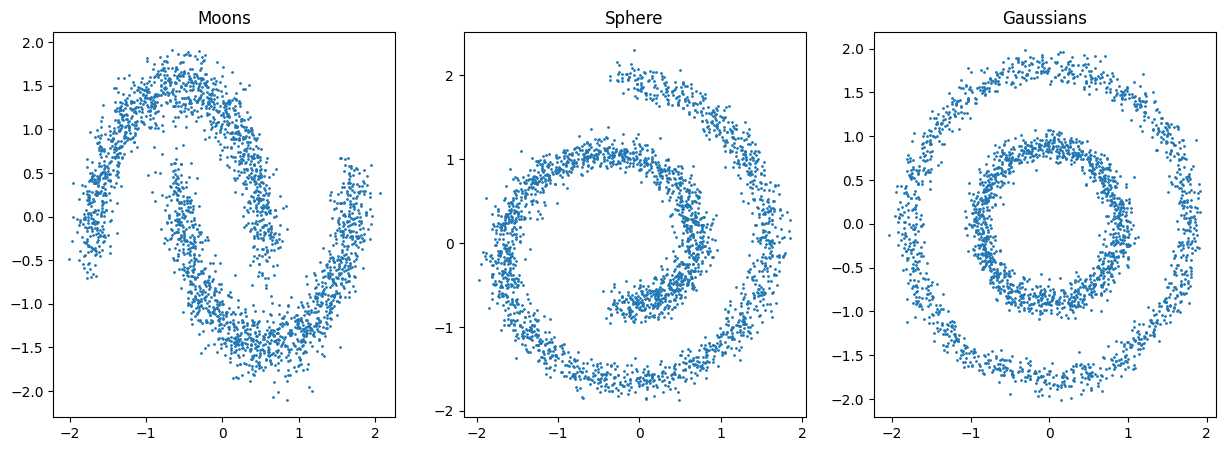

In [4]:
# plot in subplots

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(data_1[:, 0], data_1[:, 1], s=1)
ax[0].set_title(titles[0])

ax[1].scatter(data_2[:, 0], data_2[:, 1], s=1)
ax[1].set_title(titles[1])

ax[2].scatter(data_3[:, 0], data_3[:, 1], s=1)
ax[2].set_title(titles[2])

plt.show()

In [5]:
hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 1,
    'batch_size': 256,
}

LAM_moons = LAMINAR.LAMINAR(data_1, epochs=500, hyperparameters=hyperparameters)
LAM_swiss_roll = LAMINAR.LAMINAR(data_2, epochs=500, hyperparameters=hyperparameters)
LAM_circles = LAMINAR.LAMINAR(data_3, epochs=500, hyperparameters=hyperparameters)

Epoch 194 | Loss: 1.8484:  39%|███▊      | 193/500 [07:11<11:26,  2.24s/it]


Early stopping at epoch 194


Epoch 108 | Loss: 1.9232:  21%|██▏       | 107/500 [04:21<16:00,  2.44s/it]


Early stopping at epoch 108


Epoch 289 | Loss: 2.0675:  58%|█████▊    | 288/500 [19:39<14:28,  4.10s/it]


Early stopping at epoch 289


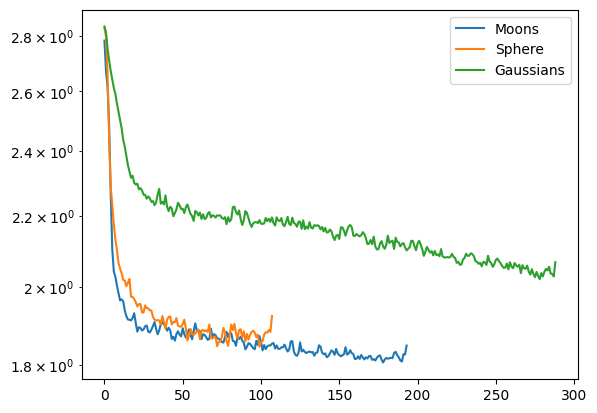

In [6]:
plt.plot(LAM_moons.loss_history, label=titles[0])
plt.plot(LAM_swiss_roll.loss_history, label=titles[1])
plt.plot(LAM_circles.loss_history, label=titles[2])

plt.yscale('log')
plt.legend()

In [7]:
print(titles[0])
LAM_moons.p_value()
print('\n')
print(titles[1])
LAM_swiss_roll.p_value()
print('\n')
print(titles[2])
LAM_circles.p_value()
print('\n')

Moons
Henze-Zirkler p-value:	1.297184023069026e-09


Sphere
Henze-Zirkler p-value:	5.188218950026677e-12


Gaussians
Henze-Zirkler p-value:	1.9629207120966314e-41




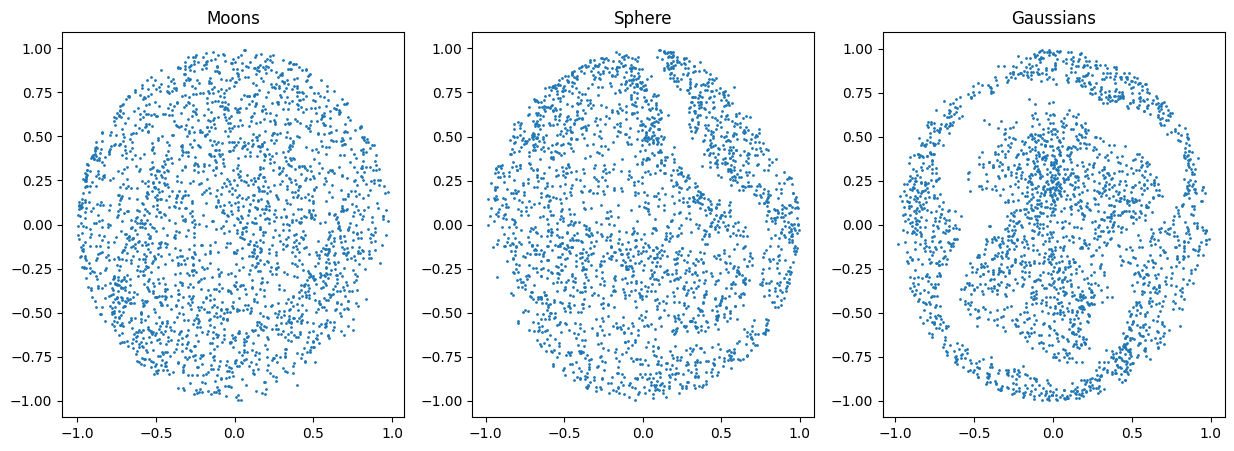

In [8]:
# plot pushed data

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(LAM_moons.data_pushed[:, 0], LAM_moons.data_pushed[:, 1], s=1)
ax[0].set_title(titles[0])

ax[1].scatter(LAM_swiss_roll.data_pushed[:, 0], LAM_swiss_roll.data_pushed[:, 1], s=1)
ax[1].set_title(titles[1])

ax[2].scatter(LAM_circles.data_pushed[:, 0], LAM_circles.data_pushed[:, 1], s=1)
ax[2].set_title(titles[2])

plt.show()

In [9]:
arr_1 = []
arr_2 = []
arr_3 = []

# tqdm?
for point in range(0, 500):
    print(point)
    data_1_dist = LAM_moons.distance(point)
    data_2_dist = LAM_swiss_roll.distance(point)
    data_3_dist = LAM_circles.distance(point)

    data_1_eu = np.linalg.norm(data_1 - data_1[point], axis=1)
    data_2_eu = np.linalg.norm(data_2 - data_2[point], axis=1)
    data_3_eu = np.linalg.norm(data_3 - data_3[point], axis=1)

    # normalize by dividing through max value
    data_1_dist = data_1_dist / max(data_1_dist)
    data_2_dist = data_2_dist / max(data_2_dist)
    data_3_dist = data_3_dist / max(data_3_dist)

    data_1_eu = data_1_eu / max(data_1_eu)
    data_2_eu = data_2_eu / max(data_2_eu)
    data_3_eu = data_3_eu / max(data_3_eu)

    data_1_diff = sum(abs(data_1_dist - data_1_eu))
    data_2_diff = sum(abs(data_2_dist - data_2_eu))
    data_3_diff = sum(abs(data_3_dist - data_3_eu))

    arr_1.append(data_1_diff)
    arr_2.append(data_2_diff)
    arr_3.append(data_3_diff)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
max_1 = max(arr_1)
max_2 = max(arr_2)
max_3 = max(arr_3)

# get point index of max difference
idx_1 = 252 #arr_1.index(max_1)
idx_2 = 252 #arr_2.index(max_2)
idx_3 = 252 #arr_3.index(max_3)

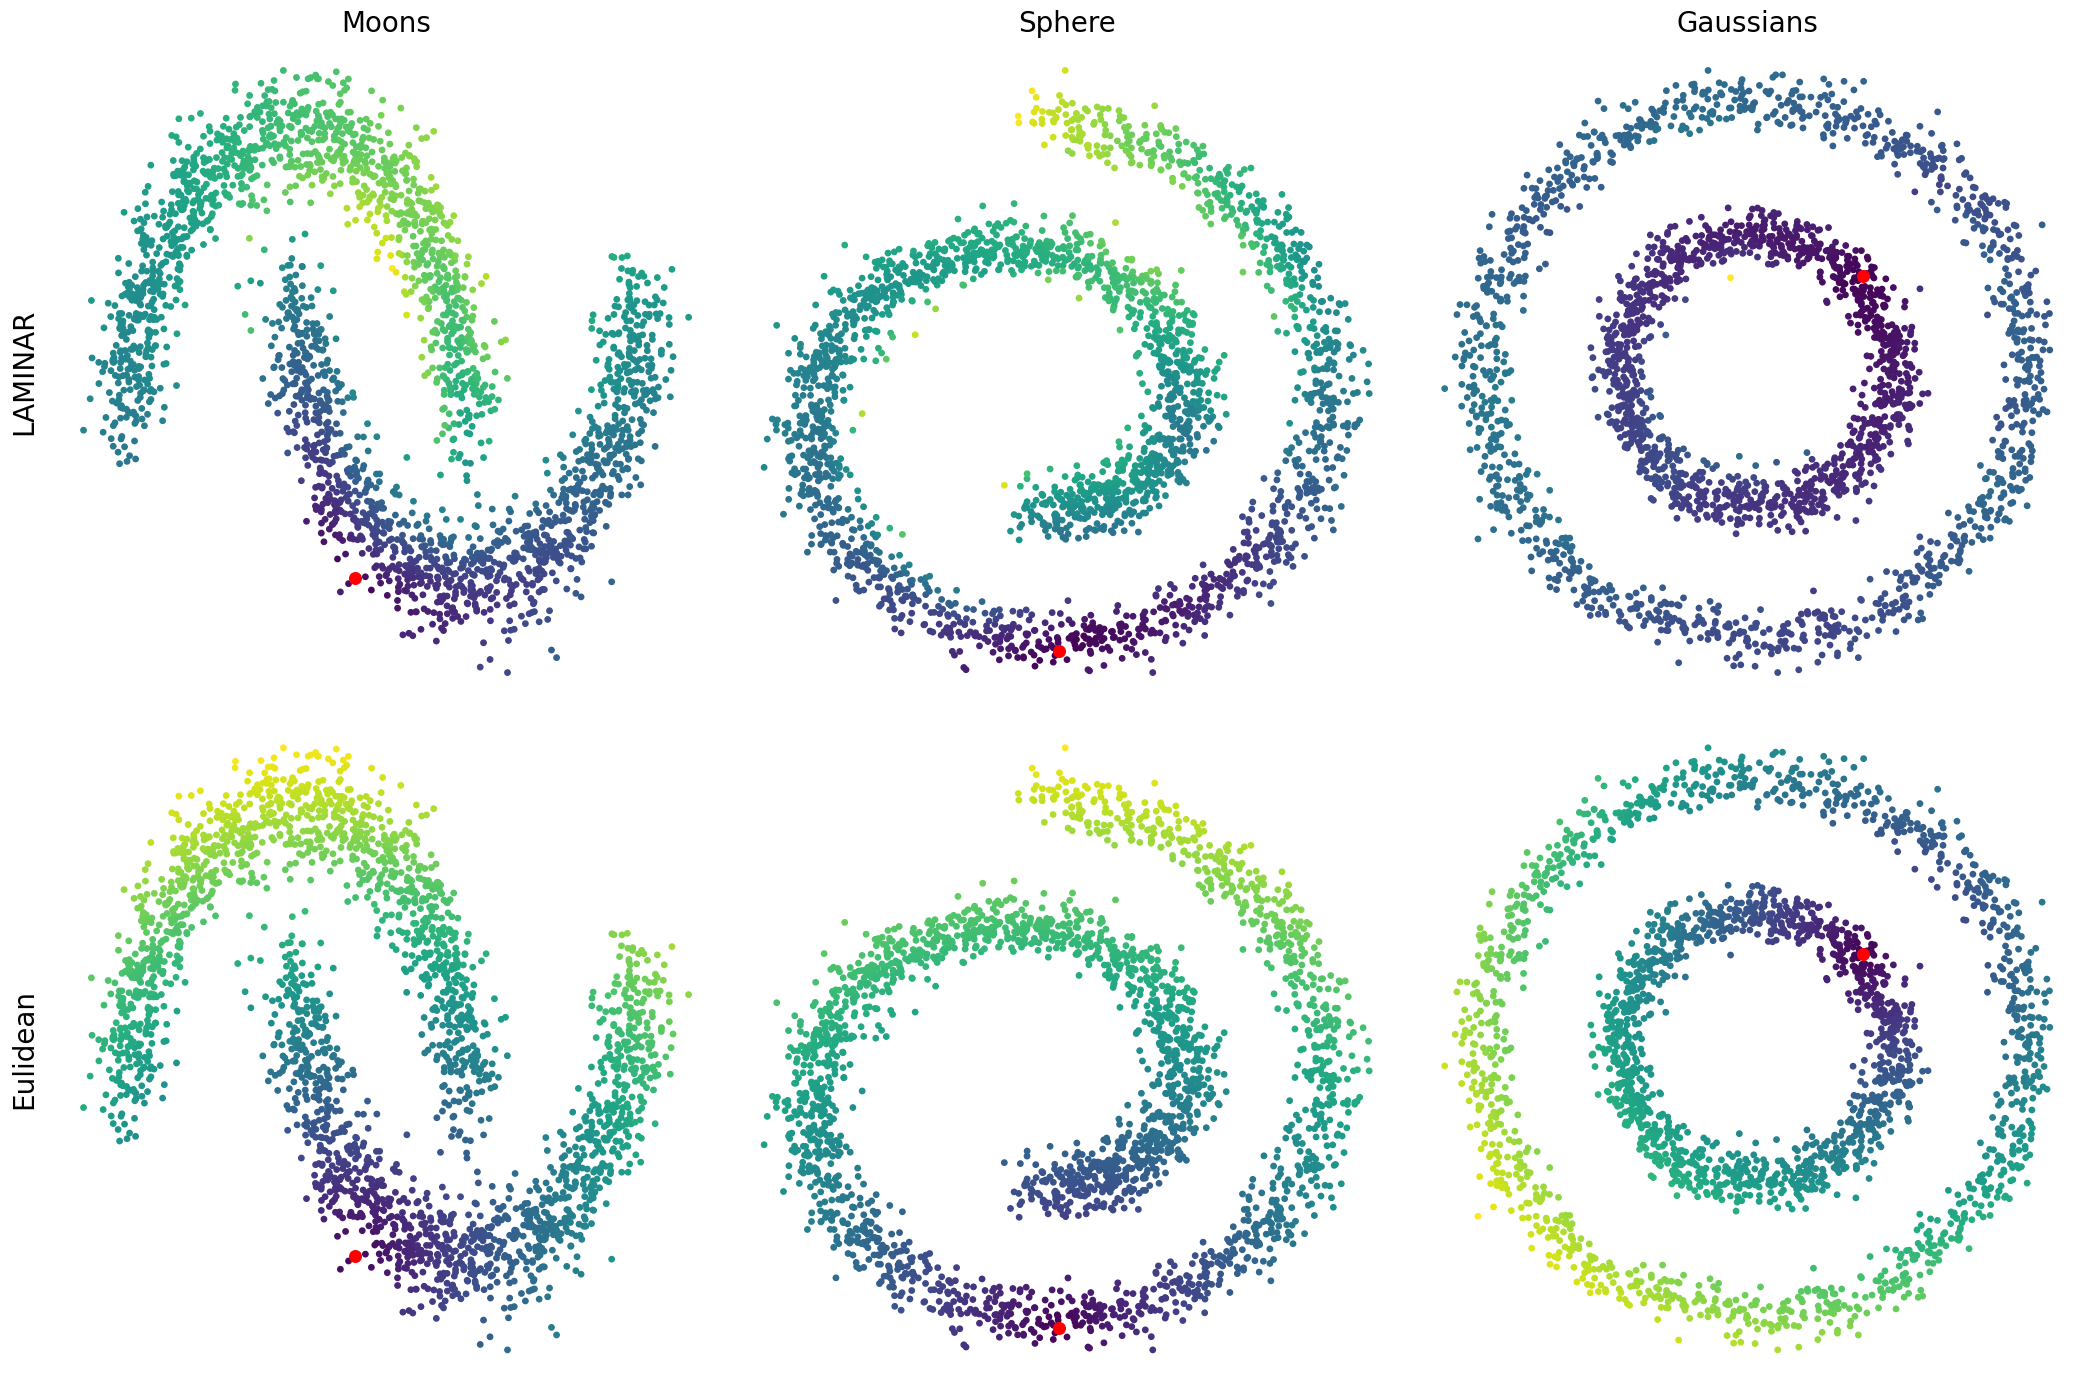

In [23]:
# point between 0 and 2500
point = [idx_1, idx_2, idx_3]

frame = False

moon_dist = LAM_moons.distance(point[0])
swiss_roll_dist = LAM_swiss_roll.distance(point[1])
circles_dist = LAM_circles.distance(point[2])

moon_eu = np.linalg.norm(data_1 - data_1[point[0]], axis=1)
swiss_roll_eu = np.linalg.norm(data_2 - data_2[point[1]], axis=1)
circles_eu = np.linalg.norm(data_3 - data_3[point[2]], axis=1)

size_regular = 15
size_cross = 70
fig, ax = plt.subplots(2, 3, figsize=(21, 14))

ax[0,0].scatter(data_1[:, 0], data_1[:, 1], c=moon_dist, s=size_regular)
ax[0,0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='r', s=size_cross, marker='o')
ax[0,0].set_title(titles[0], fontsize=20)
if not frame:
    ax[0,0].spines['top'].set_visible(False)
    ax[0,0].spines['right'].set_visible(False)
    ax[0,0].spines['bottom'].set_visible(False)
    ax[0,0].spines['left'].set_visible(False)
    ax[0,0].xaxis.set_ticks_position('none')
    ax[0,0].yaxis.set_ticks_position('none')
    ax[0,0].set_xticklabels([])
    ax[0,0].set_yticklabels([])

ax[0,1].scatter(data_2[:, 0], data_2[:, 1], c=swiss_roll_dist, s=size_regular)
ax[0,1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='r', s=size_cross, marker='o')
ax[0,1].set_title(titles[1], fontsize=20)
if not frame:
    ax[0,1].axis('off')

ax[0,2].scatter(data_3[:, 0], data_3[:, 1], c=circles_dist, s=size_regular)
ax[0,2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='r', s=size_cross, marker='o')
ax[0,2].set_title(titles[2], fontsize=20)
if not frame:
    ax[0,2].axis('off')

ax[1,0].scatter(data_1[:, 0], data_1[:, 1], c=moon_eu, s=size_regular)
ax[1,0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,0].spines['top'].set_visible(False)
    ax[1,0].spines['right'].set_visible(False)
    ax[1,0].spines['bottom'].set_visible(False)
    ax[1,0].spines['left'].set_visible(False)
    ax[1,0].xaxis.set_ticks_position('none')
    ax[1,0].yaxis.set_ticks_position('none')
    ax[1,0].set_xticklabels([])
    ax[1,0].set_yticklabels([])

ax[1,1].scatter(data_2[:, 0], data_2[:, 1], c=swiss_roll_eu, s=size_regular)
ax[1,1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,1].axis('off')

ax[1,2].scatter(data_3[:, 0], data_3[:, 1], c=circles_eu, s=size_regular)
ax[1,2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,2].axis('off')

if frame:
    for i in range(2):
        for j in range(3):
            ax[i,j].set_xticklabels([])
            ax[i,j].set_yticklabels([])
            ax[i,j].yaxis.set_ticks_position('none')
            ax[i,j].xaxis.set_ticks_position('none')       


# give the entire row a label
ax[0,0].set_ylabel('LAMINAR', fontsize=20)
ax[1,0].set_ylabel('Eulidean', fontsize=20)

plt.tight_layout()
plt.show()


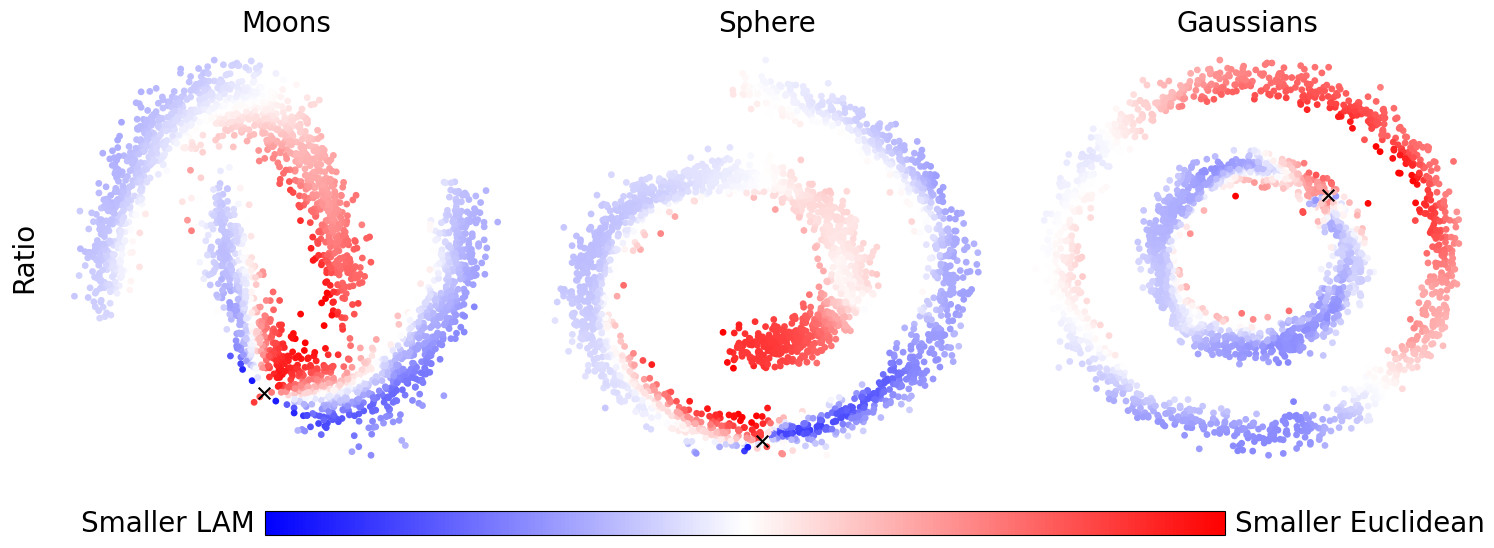

In [24]:
# point between 0 and 2500
point = [idx_1, idx_2, idx_3]

frame = False

data_1_dist = LAM_moons.distance(point[0])
data_2_dist = LAM_swiss_roll.distance(point[1])
data_3_dist = LAM_circles.distance(point[2])

data_1_eu = np.linalg.norm(data_1 - data_1[point[0]], axis=1)
data_2_eu = np.linalg.norm(data_2 - data_2[point[1]], axis=1)
data_3_eu = np.linalg.norm(data_3 - data_3[point[2]], axis=1)

# note idices where the distance is 0
data_1_zero = np.where(data_1_dist == 0)[0].reshape(-1)
data_2_zero = np.where(data_2_dist == 0)[0].reshape(-1)
data_3_zero = np.where(data_3_dist == 0)[0].reshape(-1)


# Filter out values of 0 and log
data_1_dist = np.log(data_1_dist[data_1_dist != 0])
data_2_dist = np.log(data_2_dist[data_2_dist != 0])
data_3_dist = np.log(data_3_dist[data_3_dist != 0])

data_1_eu = np.log(data_1_eu[data_1_eu != 0])
data_2_eu = np.log(data_2_eu[data_2_eu != 0])
data_3_eu = np.log(data_3_eu[data_3_eu != 0])

# standardise
data_1_dist = (data_1_dist - np.mean(data_1_dist)) / np.std(data_1_dist)
data_2_dist = (data_2_dist - np.mean(data_2_dist)) / np.std(data_2_dist)
data_3_dist = (data_3_dist - np.mean(data_3_dist)) / np.std(data_3_dist)

data_1_eu = (data_1_eu - np.mean(data_1_eu)) / np.std(data_1_eu)
data_2_eu = (data_2_eu - np.mean(data_2_eu)) / np.std(data_2_eu)
data_3_eu = (data_3_eu - np.mean(data_3_eu)) / np.std(data_3_eu)

# ratio is difference
data_1_ratio = data_1_dist - data_1_eu
data_2_ratio = data_2_dist - data_2_eu
data_3_ratio = data_3_dist - data_3_eu

# insert the value 0 again for the removed 0 values
data_1_ratio = np.insert(data_1_ratio, data_1_zero, 0)
data_2_ratio = np.insert(data_2_ratio, data_2_zero, 0)
data_3_ratio = np.insert(data_3_ratio, data_3_zero, 0)

size_regular = 15
size_cross = 70

# most extreme values
extreme = 1.5

fig, ax = plt.subplots(1, 3, figsize=(15, 6))

scatter1 = ax[0].scatter(data_1[:, 0], data_1[:, 1], c=data_1_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='black', s=size_cross, marker='x')
ax[0].set_title(titles[0], fontsize=20)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

scatter2 = ax[1].scatter(data_2[:, 0], data_2[:, 1], c=data_2_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='black', s=size_cross, marker='x')
ax[1].set_title(titles[1], fontsize=20)
ax[1].axis('off')

scatter3 = ax[2].scatter(data_3[:, 0], data_3[:, 1], c=data_3_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='black', s=size_cross, marker='x')
ax[2].set_title(titles[2], fontsize=20)
ax[2].axis('off')

# give the entire row a label
ax[0].set_ylabel('Ratio', fontsize=20)

# Add colorbar
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.18, 0.1, 0.64, 0.04])
cbar = fig.colorbar(scatter1, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([])
#cbar.set_ticklabels(['Smaller LAM', 'Indifferent', 'Smaller Euclidean'])

# add a text
fig.text(0.115, 0.105, 'Smaller LAM', ha='center', fontsize=20)
fig.text(0.91, 0.105, 'Smaller Euclidean', ha='center', fontsize=20)

#plt.tight_layout()
plt.show()


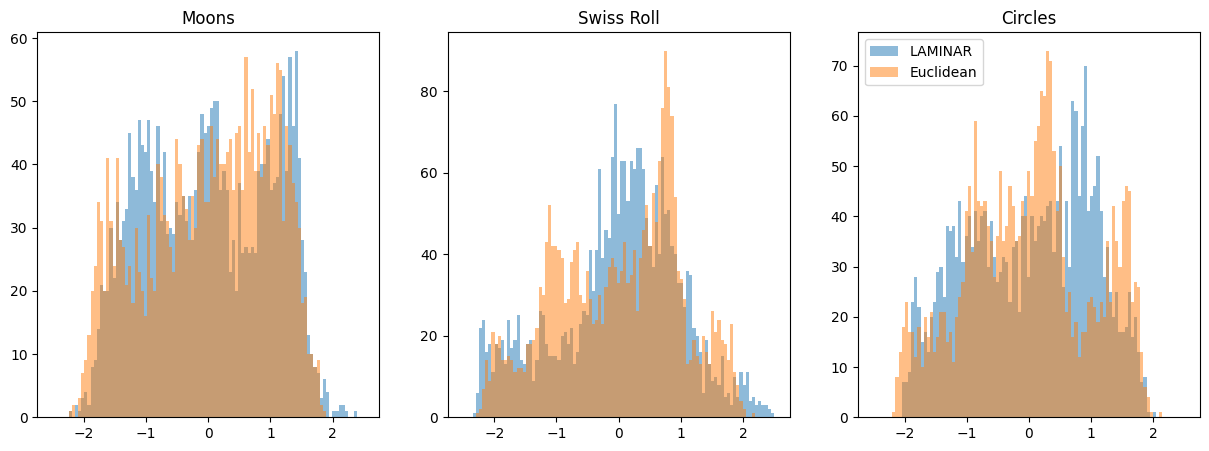

In [25]:
# for each metric, get the ditances and make a histogram of the distances

moon_dist = LAM_moons.distance(point[0])
swiss_roll_dist = LAM_swiss_roll.distance(point[1])
circles_dist = LAM_circles.distance(point[2])

moon_eu = np.linalg.norm(data_1 - data_1[point[0]], axis=1)
swiss_roll_eu = np.linalg.norm(data_2 - data_2[point[1]], axis=1)
circles_eu = np.linalg.norm(data_3 - data_3[point[2]], axis=1)

# standardize
moon_dist = (moon_dist - np.mean(moon_dist)) / np.std(moon_dist)
swiss_roll_dist = (swiss_roll_dist - np.mean(swiss_roll_dist)) / np.std(swiss_roll_dist)
circles_dist = (circles_dist - np.mean(circles_dist)) / np.std(circles_dist)

moon_eu = (moon_eu - np.mean(moon_eu)) / np.std(moon_eu)
swiss_roll_eu = (swiss_roll_eu - np.mean(swiss_roll_eu)) / np.std(swiss_roll_eu)
circles_eu = (circles_eu - np.mean(circles_eu)) / np.std(circles_eu)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(moon_dist, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='LAMINAR')
ax[0].hist(moon_eu, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='Euclidean')
ax[0].set_title('Moons')

ax[1].hist(swiss_roll_dist, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='LAMINAR')
ax[1].hist(swiss_roll_eu, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='Euclidean')
ax[1].set_title('Swiss Roll')

ax[2].hist(circles_dist, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='LAMINAR')
ax[2].hist(circles_eu, bins=np.linspace(-2.5, 2.5, 100), alpha=0.5, label='Euclidean')
ax[2].set_title('Circles')

plt.legend()